In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from math import sqrt
from sklearn.metrics import mean_squared_error

In [7]:
#Transformación para series temporales donde cogemos el año como índice del dataframe
financialDF = pd.read_csv('Datos/ds_target_cat.csv', header=0, index_col=1, parse_dates=True)
financialDF.head()

,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,CSR__NET_MARGIN_RANKING,IS__REVENUE_RANKING,IS__NET_INCOME_RANKING,IS__COST_OF_GOODS_SOLD_RANKING,BS__TOTAL_EQUITY_RANKING,IS__EBITDA_RANKING,BS__TOTAL_ASSETS_RANKING,BS__LONG_TERM_DEBT_RANKING,BS__TOTAL_CURRENT_LIABILITIES_RANKING,TARGET_RANKING
YEAR,,,,,,,,,,,,,,,,,,,,,
2012-01-01,ETE,12732.3534,27.89,19.82,11.46,8.02,5,0.73,6.03,0.74,...,2787,371,933,255,260,276,302,64,320,714
2007-01-01,ETE,8191.2308,2122.84,25.13,14.74,11.92,5,1.16,0.00,1.52,...,1419,315,417,219,444,319,354,109,374,1385
2015-01-01,ETE,14384.6808,0.00,28.67,5.90,7.28,7,0.41,0.00,0.81,...,3365,176,407,108,194,209,276,36,449,1756
2014-01-01,ETE,31002.7009,72.22,28.98,8.00,5.10,7,0.56,46.73,1.44,...,3936,123,725,69,211,230,306,53,347,5349
2010-01-01,ETE,8712.4952,317.83,24.53,9.21,15.92,5,1.33,72.37,1.05,...,2391,631,1021,471,508,499,529,146,821,1060


In [8]:
financialDF.shape

(87438, 52)

### Limpieza y preprocesado de los datos

Voy a quedarme con las columnas que me interesan

In [9]:
financialDF.columns

Index(['CODE', 'VQ_MARKET_CAP', 'CSR__ROE', 'VR__EV_TO_EBIT',
       'CSR__ROC_JOEL_GREENBLATT', 'CSR__OPERATING_MARGIN',
       'VQ__PIOTROSKI_F_SCORE', 'VR__PS_RATIO', 'VR__PB_RATIO',
       'VQ__ALTMAN_Z_SCORE', 'CSR__ROA', 'PSDA__EARNINGS_PER_SHARE_DILUTED',
       'CSR__ROIC', 'CSR__GROSS_MARGIN', 'VQ__YOY_EPS_GROWTH',
       'VQ__YOY_EBITDA_GROWTH', 'PSDA__EBITDA_PER_SHARE',
       'PSDA__TOTAL_DEBT_PER_SHARE', 'CSR__NET_MARGIN', 'IS__REVENUE',
       'IS__NET_INCOME', 'IS__COST_OF_GOODS_SOLD', 'BS__TOTAL_EQUITY',
       'IS__EBITDA', 'BS__TOTAL_ASSETS', 'BS__LONG_TERM_DEBT',
       'BS__TOTAL_CURRENT_LIABILITIES', 'PRICE_START', 'PRICE_END', 'RETURNS',
       'RISK', 'INDUSTRY01', 'INDUSTRY02', 'TARGET', 'RETURNS_CAT',
       'TARGET_CAT', 'VR__EV_TO_EBIT_RANKING',
       'CSR__ROC_JOEL_GREENBLATT_RANKING', 'RETURNS_RANKING',
       'PSDA__EARNINGS_PER_SHARE_DILUTED_RANKING',
       'PSDA__EBITDA_PER_SHARE_RANKING', 'PSDA__TOTAL_DEBT_PER_SHARE_RANKING',
       'CSR__NET_MARGIN_R

In [10]:
columns_to_drop = ['INDUSTRY01','INDUSTRY02', 'TARGET', 'RETURNS_CAT','TARGET_CAT', 'VR__EV_TO_EBIT_RANKING',
                   'CSR__ROC_JOEL_GREENBLATT_RANKING', 'RETURNS_RANKING','PSDA__EARNINGS_PER_SHARE_DILUTED_RANKING',
                   'PSDA__EBITDA_PER_SHARE_RANKING', 'PSDA__TOTAL_DEBT_PER_SHARE_RANKING','CSR__NET_MARGIN_RANKING', 
                   'IS__REVENUE_RANKING', 'IS__NET_INCOME_RANKING', 'IS__COST_OF_GOODS_SOLD_RANKING',
                   'BS__TOTAL_EQUITY_RANKING', 'IS__EBITDA_RANKING','BS__TOTAL_ASSETS_RANKING', 'BS__LONG_TERM_DEBT_RANKING',
                   'BS__TOTAL_CURRENT_LIABILITIES_RANKING', 'TARGET_RANKING']
financialDF = financialDF.drop(columns_to_drop, axis=1) 

In [11]:
financialDFByCode = financialDF.groupby(['CODE'])
financialDFByCode = financialDFByCode.apply(lambda x: x.sort_index())
lista_codigos = financialDFByCode['CODE'].unique()
NUM_EMPRESAS = len(lista_codigos)
financialDFByCode.head()

CODE  VQ_MARKET_CAP  CSR__ROE  VR__EV_TO_EBIT  \
CODE YEAR                                                       
A    1999-01-01    A         0.0000     15.99            0.00   
     2000-01-01    A     14164.1760     17.51           13.40   
     2001-01-01    A      6919.6100      3.08           -7.25   
     2002-01-01    A      4324.6052    -20.07           -2.26   
     2003-01-01    A      7994.5585    -55.24          -10.47   

                 CSR__ROC_JOEL_GREENBLATT  CSR__OPERATING_MARGIN  \
CODE YEAR                                                          
A    1999-01-01                     16.93                   6.18   
     2000-01-01                     28.35                   9.87   
     2001-01-01                    -23.05                  -9.27   
     2002-01-01                    -54.40                 -26.74   
     2003-01-01                    -33.83                 -16.11   

                 VQ__PIOTROSKI_F_SCORE  VR__PS_RATIO  VR__PB_RATIO  \
CODE YEAR                                                            
A    1999-01-01                      0          0.00          0.00   
     2000-01-01                      6          1.46          2.69   
     2001-01-01                      6          0.80          1.22   
     2002-01-01                      1          0.72          0.93   
     2003-01-01                      2          1.78          2.83   

                 VQ__ALTMAN_Z_SCORE    ...      IS__COST_OF_GOODS_SOLD  \
CODE YEAR                              ...                               
A    1999-01-01                1.94    ...                      3627.0   
     2000-01-01                4.86    ...                      4586.0   
     2001-01-01                3.25    ...                      4890.0   
     2002-01-01                1.21    ...                      3694.0   
     2003-01-01                1.62    ...                      2633.0   

                 BS__TOTAL_EQUITY  IS__EBITDA  BS__TOTAL_ASSETS  \
CODE YEAR                                                         
A    1999-01-01            3382.0       862.0            5444.0   
     2000-01-01            5265.0      1384.0            8330.0   
     2001-01-01            5659.0       -44.0            7986.0   
     2002-01-01            4627.0      -872.0            8203.0   
     2003-01-01            2824.0      -358.0            6297.0   

                 BS__LONG_TERM_DEBT  BS__TOTAL_CURRENT_LIABILITIES  \
CODE YEAR                                                            
A    1999-01-01                 0.0                         1681.0   
     2000-01-01                 0.0                         2663.0   
     2001-01-01                 0.0                         2002.0   
     2002-01-01              1150.0                         2181.0   
     2003-01-01              1150.0                         1906.0   

                 PRICE_START  PRICE_END   RETURNS       RISK  
CODE YEAR                                                     
A    1999-01-01        27.20      41.44  0.523529   6.648929  
     2000-01-01        43.80      36.05 -0.176941  15.924856  
     2001-01-01        36.89      18.93 -0.486853   6.948052  
     2002-01-01        19.21      12.26 -0.361791   5.163617  
     2003-01-01        12.10      19.12  0.580165   3.297241  

[5 rows x 31 columns]

Calculo el porcentaje de filas que tienen valores NaN en el dataset

In [8]:
round(((financialDFByCode.isna().sum()/financialDFByCode.shape[0])*100),2)

CODE                                 0.00
VQ_MARKET_CAP                        0.15
CSR__ROE                             1.34
VR__EV_TO_EBIT                       7.39
CSR__ROC_JOEL_GREENBLATT            13.35
CSR__OPERATING_MARGIN                4.11
VQ__PIOTROSKI_F_SCORE                0.00
VR__PS_RATIO                         4.53
VR__PB_RATIO                         1.58
VQ__ALTMAN_Z_SCORE                   0.00
CSR__ROA                             0.01
PSDA__EARNINGS_PER_SHARE_DILUTED     0.00
CSR__ROIC                            1.99
CSR__GROSS_MARGIN                   16.71
VQ__YOY_EPS_GROWTH                   0.28
VQ__YOY_EBITDA_GROWTH                9.48
PSDA__EBITDA_PER_SHARE               0.15
PSDA__TOTAL_DEBT_PER_SHARE           0.15
CSR__NET_MARGIN                      4.11
IS__REVENUE                          0.00
IS__NET_INCOME                       0.00
IS__COST_OF_GOODS_SOLD              12.60
BS__TOTAL_EQUITY                     0.00
IS__EBITDA                        

Voy a mirar qué empresas las que vienen con valores a NaN para descartarlas y quedarme solo con aquellas que tienen 
todos los valores

In [20]:
%%time
lista_companyas = []
for c in lista_codigos:
    dataCompanya = financialDFByCode.loc[c]
    arrayNaNCompanya = ((dataCompanya.isna().sum()/dataCompanya.shape[0])*100).values    
    numNaN = arrayNaNCompanya.sum()
    if numNaN == 0:
        lista_companyas.append(c)
NUM_EMPRESAS = len(lista_companyas)
print('Número de compañías en el estudio: ', NUM_EMPRESAS)

Número de compañías en el estudio:  6282
CPU times: user 14.3 s, sys: 16 ms, total: 14.3 s
Wall time: 14.4 s


En una primera aproximación, me voy a quedar solo con aquellas empresas que no tienen valores NaN en ninguna de sus filas, asumiendo que la calidad del dato para estos casos es mayor. Queda pendiente una revisión de los datos de las compañías descartadas para intentar aumentar el universo de datos.

De las empresas restantes, nos quedamos con las que tienen datos de los últimos 10 años (al menos) y no tienen saltos en las series temporales.

In [21]:
%%time
lista_companyas_def = []
financialDF = pd.DataFrame()
for c in lista_companyas:        
    df = (financialDFByCode[financialDFByCode['CODE']==c])
    if len(df.index.values) > 11:
        anyo_min = df.index.values[0]
        anyo_max = df.index.values[-1]
        num_valores = ((anyo_max[1] - anyo_min[1])/365).days
        if (num_valores + 1) == len(df.index.values): #Tengo series temporales sin saltos
            #me quedo con la ultima fila
            df = (financialDFByCode[financialDFByCode['CODE']==c]).iloc[-1:]
            t = df.index.values[0][1]
            if t.year == 2017:            
                lista_companyas_def.append(c)
NUM_EMPRESAS = len(lista_companyas_def)
print('Número de compañías en el estudio: ', NUM_EMPRESAS)   

Número de compañías en el estudio:  1319
CPU times: user 1min 3s, sys: 0 ns, total: 1min 3s
Wall time: 1min 3s


In [22]:
#Me quedo con las filas correspondientes a las 1319 compañías
financialDFByCode = financialDFByCode[financialDFByCode['CODE'].isin(lista_companyas_def)]
lista_codigos = financialDFByCode['CODE'].unique()
financialDFByCode.shape

(28779, 31)

A parte de los valores missing, vamos a observar aquellas filas que tengan cero en alguna columna y a proceder a su tratamiento

In [23]:
columns = financialDFByCode.columns
columns = columns.drop(['CODE'])
#Estudio de las columnas con ceros
for col in columns:
    filas = financialDFByCode.shape[0]
    filas_nozero = len((financialDFByCode.loc[:,col]).nonzero()[0])
    zeros = filas - filas_nozero
    print(col, 'con', str(round((zeros/filas)*100,2)), '% de ceros')


VQ_MARKET_CAP con 1.13 % de ceros
CSR__ROE con 7.29 % de ceros
VR__EV_TO_EBIT con 1.14 % de ceros
CSR__ROC_JOEL_GREENBLATT con 3.61 % de ceros
CSR__OPERATING_MARGIN con 4.32 % de ceros
VQ__PIOTROSKI_F_SCORE con 7.63 % de ceros
VR__PS_RATIO con 4.58 % de ceros
VR__PB_RATIO con 8.75 % de ceros
VQ__ALTMAN_Z_SCORE con 3.4 % de ceros
CSR__ROA con 1.14 % de ceros
PSDA__EARNINGS_PER_SHARE_DILUTED con 0.99 % de ceros
CSR__ROIC con 8.4 % de ceros
CSR__GROSS_MARGIN con 12.88 % de ceros
VQ__YOY_EPS_GROWTH con 4.04 % de ceros
VQ__YOY_EBITDA_GROWTH con 2.55 % de ceros
PSDA__EBITDA_PER_SHARE con 0.75 % de ceros
PSDA__TOTAL_DEBT_PER_SHARE con 18.73 % de ceros
CSR__NET_MARGIN con 4.05 % de ceros
IS__REVENUE con 3.92 % de ceros
IS__NET_INCOME con 0.14 % de ceros
IS__COST_OF_GOODS_SOLD con 12.48 % de ceros
BS__TOTAL_EQUITY con 0.92 % de ceros
IS__EBITDA con 0.36 % de ceros
BS__TOTAL_ASSETS con 1.12 % de ceros
BS__LONG_TERM_DEBT con 27.38 % de ceros
BS__TOTAL_CURRENT_LIABILITIES con 2.85 % de ceros
PRICE

Para el caso concreto de los valores a cero en PRICE_END, observamos que son dos compañías que tienen esos datos a cero, yendo a Yahoo Financials podemos deducir que se trata de un redondeo en los decimales y que en estos casos RETURNS tiene un valor muy próximo a -1, que es el valor que marca la columna. Por lo tanto no hacemos nada al respecto. Lo que sí que haremos es quitar las columnas PRICE_START y PRICE_END del dataset, ya que la información relacionada con estas dos columnas queda recogida por la columna RETURNS.

In [24]:
financialDFByCode[(financialDFByCode.PRICE_END == 0)].loc[:,['CODE','PRICE_START', 'PRICE_END', 'RETURNS']]

,,CODE,PRICE_START,PRICE_END,RETURNS
CODE,YEAR,,,,
MACQF,2015-01-01,MACQF,0.03,0.0,-1.0
SPYR,2008-01-01,SPYR,0.01,0.0,-1.0


In [25]:
financialDFByCode = financialDFByCode.drop(['PRICE_START', 'PRICE_END'], axis=1) 
financialDFByCode.head()

CODE  VQ_MARKET_CAP  CSR__ROE  VR__EV_TO_EBIT  \
CODE YEAR                                                       
A    1999-01-01    A         0.0000     15.99            0.00   
     2000-01-01    A     14164.1760     17.51           13.40   
     2001-01-01    A      6919.6100      3.08           -7.25   
     2002-01-01    A      4324.6052    -20.07           -2.26   
     2003-01-01    A      7994.5585    -55.24          -10.47   

                 CSR__ROC_JOEL_GREENBLATT  CSR__OPERATING_MARGIN  \
CODE YEAR                                                          
A    1999-01-01                     16.93                   6.18   
     2000-01-01                     28.35                   9.87   
     2001-01-01                    -23.05                  -9.27   
     2002-01-01                    -54.40                 -26.74   
     2003-01-01                    -33.83                 -16.11   

                 VQ__PIOTROSKI_F_SCORE  VR__PS_RATIO  VR__PB_RATIO  \
CODE YEAR                                                            
A    1999-01-01                      0          0.00          0.00   
     2000-01-01                      6          1.46          2.69   
     2001-01-01                      6          0.80          1.22   
     2002-01-01                      1          0.72          0.93   
     2003-01-01                      2          1.78          2.83   

                 VQ__ALTMAN_Z_SCORE    ...      IS__REVENUE  IS__NET_INCOME  \
CODE YEAR                              ...                                    
A    1999-01-01                1.94    ...           6830.0           512.0   
     2000-01-01                4.86    ...           9361.0           757.0   
     2001-01-01                3.25    ...           8396.0           168.0   
     2002-01-01                1.21    ...           6010.0         -1032.0   
     2003-01-01                1.62    ...           4468.0         -2058.0   

                 IS__COST_OF_GOODS_SOLD  BS__TOTAL_EQUITY  IS__EBITDA  \
CODE YEAR                                                               
A    1999-01-01                  3627.0            3382.0       862.0   
     2000-01-01                  4586.0            5265.0      1384.0   
     2001-01-01                  4890.0            5659.0       -44.0   
     2002-01-01                  3694.0            4627.0      -872.0   
     2003-01-01                  2633.0            2824.0      -358.0   

                 BS__TOTAL_ASSETS  BS__LONG_TERM_DEBT  \
CODE YEAR                                               
A    1999-01-01            5444.0                 0.0   
     2000-01-01            8330.0                 0.0   
     2001-01-01            7986.0                 0.0   
     2002-01-01            8203.0              1150.0   
     2003-01-01            6297.0              1150.0   

                 BS__TOTAL_CURRENT_LIABILITIES   RETURNS       RISK  
CODE YEAR                                                            
A    1999-01-01                         1681.0  0.523529   6.648929  
     2000-01-01                         2663.0 -0.176941  15.924856  
     2001-01-01                         2002.0 -0.486853   6.948052  
     2002-01-01                         2181.0 -0.361791   5.163617  
     2003-01-01                         1906.0  0.580165   3.297241  

[5 rows x 29 columns]

El caso de VQ_MARKET_CAP tampoco puede ser cero, voy a observar qué filas son las que vienen a cero para esa columna

In [26]:
lista_emp_sin_cap = (financialDFByCode[(financialDFByCode.VQ_MARKET_CAP == 0)].loc[:,['CODE','VQ_MARKET_CAP']])['CODE'].unique()
len(lista_emp_sin_cap)

147

Me voy a calzar también estas 147 empresas, en futuras iteraciones se puede intentar poner como capitalización el valor del año anterior.

In [27]:
financialDFByCode = financialDFByCode[~financialDFByCode['CODE'].isin(lista_emp_sin_cap)]
lista_codigos = financialDFByCode['CODE'].unique()
NUM_EMPRESAS = len(lista_codigos)
print('Número de empresas en el estudio', NUM_EMPRESAS)
financialDFByCode.shape

Número de empresas en el estudio 1172


(25658, 29)

**Prueba:** Me voy a quedar solo con las dos columnas de la fórmula mágica de greenblat:VR__EV_TO_EBIT y CSR__ROC_JOEL_GREENBLATT

In [28]:
financialDFByCode = financialDFByCode.loc[:,['CODE','VR__EV_TO_EBIT', 'CSR__ROC_JOEL_GREENBLATT', 'RETURNS']]
financialDFByCode.shape

(25658, 4)

In [29]:
financialDFByCode.describe()

,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,RETURNS
count,2.565800e+04,2.565800e+04,25658.000000
mean,-1.968916e+02,1.428907e+14,0.249163
std,2.002773e+05,9.564786e+16,6.469114
min,-1.000000e+07,-7.407521e+18,-0.999556
25%,-5.000000e-01,-1.575000e-01,-0.192264
50%,1.014000e+01,1.433000e+01,0.056197
75%,1.677000e+01,3.839000e+01,0.336390
max,1.000000e+07,1.323554e+19,999.000000


Observo valores anómalos en RETURNS, ya que un 99900% de rentabilidad es excesivo.

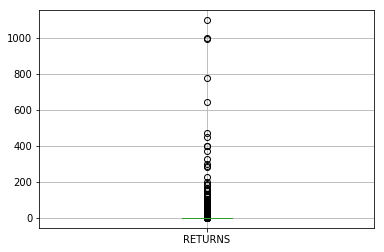

In [19]:
financialDFByCode.boxplot(column=['RETURNS'])
plt.show()

In [30]:
returnsOutliers = (financialDFByCode[(financialDFByCode.RETURNS > 0.33)].loc[:,:])
returnsOutliers.shape

(6537, 4)

In [31]:
returnsNoOutliers = (financialDFByCode[(financialDFByCode.RETURNS < 0.33)].loc[:,:])
returnsNoOutliers.shape

(19121, 4)

In [17]:
returnsNoOutliers = (financialDFByCode[(financialDFByCode.RETURNS < 1)].loc[:,:])

In [18]:
returnsOutliers.shape

(5727, 31)

In [ ]:
len(returnsNoOutliers['CODE'].unique())

# TODO: ANÁLISIS INDIVIDUAL DE LAS COLUMNAS A CERO

Primero vamos a establecer un modelo básico (la predicción del valor en el momento t+1 es la misma que la del valor t) y a medir su rendimiento. Nos servirá como punto de partida para comparar la mejora en los siguientes algoritmos

### Persistence model

In [ ]:
series = financialDFByCode.loc[:,'RETURNS']

In [ ]:
# persistence model
def model_persistence(x):
    return x

In [ ]:
def create_model(serie, split_value):
    # create lagged dataset
    values = pd.DataFrame(serie.values)
    dataframe = pd.concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t', 't+1']
    # split into train and test sets
    X = dataframe.values
    limite = int(len(X)*split_value)
    if split_value == 1:
        limite = 1
    train, test = X[1:len(X)-limite], X[len(X)-limite:]    
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    rmse = sqrt(mean_squared_error(test_y, predictions))
    return test_y,predictions,rmse    

In [ ]:
plt.clf()
seriePorSimbolo = series.groupby(['CODE'])
i = 1
plt.figure(figsize=(20,20))
persistence_model = list()
for code, group in seriePorSimbolo:    
    plt.subplot(4, 5, i)
    test_y,predictions,rmse = create_model(group, 0.6) #En realidad habría que poner un 0.2, pero para que los gráficos queden mas molones ponemos 0.6
    strRmse = ') rmse: %.3f'%rmse
    title = code + '(' + str(len(group)) + strRmse
    plt.title(title)
    # plot predictions vs expected
    plt.plot(test_y)
    plt.plot(predictions, color='red')
    if i == 20:
        i=0
        plt.show()
        plt.figure(figsize=(20,20))
    i = i+1

In [ ]:
#Predigo solo el último valor, es decir, para el 2017 devuelvo lo mismo que obtuve en 2016
#El rmse será el error producido entre el valor real de 2017 y el que se devolvió (valor a 2016)
#Esto me va a servir para comparar este modelo con el resto
persistence_model = list()
for code, group in seriePorSimbolo:    
    test_y,predictions,rmse = create_model(group, 1)                                                     
    persistence_model.append({'codigo':code, 'prediction':predictions, 'rmse': rmse})

### VAR (Vector Auto Regression)

Partiendo del modelo anterior, vamos a aplicar distintos algoritmos que lo mejoren. El primero de ellos será VAR.

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

excepciones = []
predictions = list()
for c in lista_codigos:
    data = financialDFByCode.loc[c]
    data = data.drop(['CODE'], axis=1) 
    #creating the train and validation set
    train = data[:int(0.8*(len(data)))]
    valid = data[int(0.8*(len(data))):]
    try:
        #fit the model
        model = VAR(endog=train)
        model_fit = model.fit()

        # make prediction on validation    
        p = model_fit.forecast(model_fit.y, steps=len(valid))
        predictions.append({'codigo':c, 'prediction':p, 'valid': valid})
    except:
        excepciones.append(c)

In [ ]:
print('Hay',str(len(excepciones)),'empresas que no se han podido predecir')

Obtenemos los RMSE de cada empresa para la columna RETURNS (nuestra target)

In [ ]:
cols = (financialDFByCode.drop(['CODE'], axis=1)).columns
#converting predictions to dataframe
var_model=list()
for prediction_companya in predictions:
    prediction = prediction_companya['prediction'] 
    valid = prediction_companya['valid'] 
    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,len(cols)):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]

    rmse = sqrt(mean_squared_error(pred['RETURNS'], valid['RETURNS']))    
    print('rmse para', prediction_companya['codigo'], sqrt(mean_squared_error(pred['RETURNS'], valid['RETURNS'])))
    

Aparentemente los resultados son muy malos, peores que los del modelo básico. Para comprobarlo, vamos a realizar la predicción del 2017 y a compararla con el valor real, calculando así el RMSE. Después lo comprararemos con el resultado obtenido con el persistence_model

In [ ]:
#make final predictions
var_model = list()
for c in lista_codigos:
    data = financialDFByCode.loc[c]
    data = data[0:len(data)-1]  #Le quito el último anyo, hago la predicción de 2017 para poder comparar con el otro modelo
    data = data.drop(['CODE'], axis=1) 
    index_returns = data.columns.get_loc('RETURNS')    
    model = VAR(endog=data)
    try :
        model_fit = model.fit()
        yhat = model_fit.forecast(model_fit.y, steps=1)        
        #predicciones_finales.append({'codigo':c, 'prediction':yhat[0][26]})
        test_y = financialDFByCode.loc[c].loc[:,'RETURNS'][-1] #RETURNS de 2017        
        rmse = sqrt(mean_squared_error(np.atleast_1d(test_y), np.atleast_1d(yhat[0][index_returns]))) 
        var_model.append({'codigo':c, 'prediction':yhat[0][index_returns], 'rmse': rmse})
    except:
        pass

Pintamos los resultados del persistence_model vs VAR

In [ ]:
num_mejores_pred = 0
for elem_var in var_model:
    for elem_per in persistence_model:
        if elem_per['codigo'] == elem_var['codigo']:
            print('Compañía:', elem_var['codigo'], 'RMSE(1):', elem_per['rmse'], 'RMSE(2)',elem_var['rmse'])
            if elem_per['rmse']>elem_var['rmse']:
                num_mejores_pred = num_mejores_pred + 1

In [ ]:
print('El VAR ha sido mejor', num_mejores_pred, 'veces de', len(var_model))                